# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле, требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times k$, $V^T$ — ортогональная матрица размера $k\times n$, $\Sigma$ — диагональная матрица размера $k\times k$, причём $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [1]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

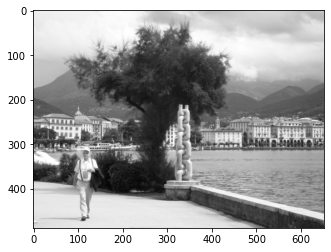

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [3]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

Text(0.5, 1.0, 'Диагональные элементы матрицы S')

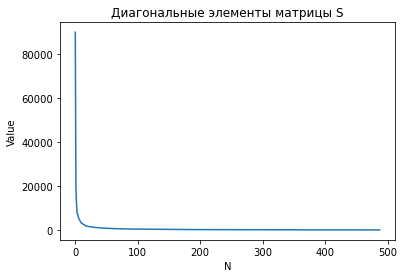

In [4]:
plt.plot(S)
plt.xlabel('N')
plt.ylabel('Value')
plt.title("Диагональные элементы матрицы S")

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

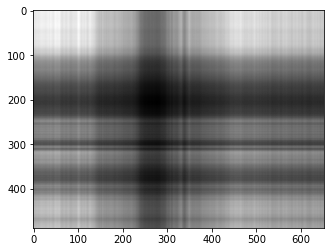

In [5]:
e1 = np.zeros((488, 488))
e1[0, 0] = S[0]
res = np.dot(np.dot(U, e1), VT)
imgplot = plt.imshow(res, cmap='gray')

**Во-первых, полученное изображение достаточно сильно отличается от исходного, это обосновывается большим значением нормы размности матриц задающих изображение (просуммированны в квадрате все сигмы кроме первой).  
Во-вторых, изображение состоит из "похожих" полосок разной темноты, это обосновывается тем, что полученая матрица имеет ранг равный единице, а следовательно все столбцы и строки пропорциональны.**

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

Text(0.5, 1.0, 'Cуммa компонент ранга 1 с первой по двадцатую')

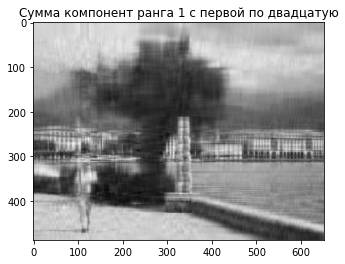

In [6]:
d1 = np.zeros(488)
d1[0:20] = S[0:20]
e1 = np.diag(d1)

plt.imshow(np.dot(np.dot(U, e1), VT), cmap='gray')
plt.title("Cуммa компонент ранга 1 с первой по двадцатую")

Text(0.5, 1.0, 'Cуммa компонент ранга 1 с первой по пятидесятую')

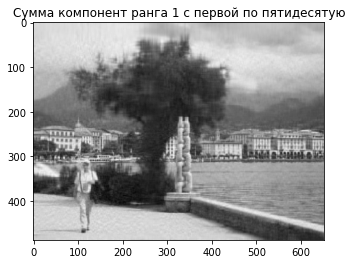

In [7]:
d2 = np.zeros(488)
d2[0:50] = S[0:50]
e2 = np.diag(d2)

plt.imshow(np.dot(np.dot(U, e2), VT), cmap='gray')
plt.title("Cуммa компонент ранга 1 с первой по пятидесятую")

Text(0.5, 1.0, 'Cуммa компонент ранга 1 с двадцатой по сотую')

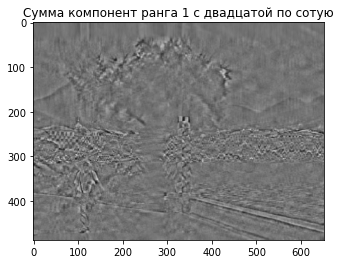

In [8]:
d3 = np.zeros(488)
d3[20:100] = S[20:100]
e3 = np.diag(d3)

plt.imshow(np.dot(np.dot(U, e3), VT), cmap='gray')
plt.title("Cуммa компонент ранга 1 с двадцатой по сотую")

Text(0.5, 1.0, 'Cуммa компонент ранга 1 с двадцатой по последнюю')

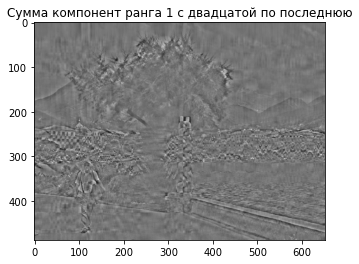

In [9]:
d4 = np.zeros(488)
d4[20:] = S[20:]
e4 = np.diag(d4)

plt.imshow(np.dot(np.dot(U, e4), VT), cmap='gray')
plt.title("Cуммa компонент ранга 1 с двадцатой по последнюю")

**Самое четкое изображение получилось второе, действительно в норме разности с исходным изображением не участвуют первые 50 (самых больших) квадратов сигм. Чуть похуже получилось первое изображение, так как в ней теперь не участвуют только первые 20, но всё равно самых большх, элементов. Третье и четвертое изображение получились совсем размытыми, хоть в норме их разности не участвует самое большое количество квадратов сигм, но они не первые и, как мы видели по распределению (и знаем из теоремы), их значени в разы меньше первых.**


**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

Наша метрика качетсва - норма разности между матрицами описывающеми исходное изображение и полученное. 
$$||A - A_{new}||_{frob} = \sqrt{\sum\limits_{i | S_{new}[i] = 0} \sigma_{i}^2}$$   
Как мы знаем сигмы идут по убыванию, а следовательно для более четкого изображения следует взять именно первые n компонент.   
Выберем n:


Text(0.5, 1.0, 'Диагональные элементы матрицы S')

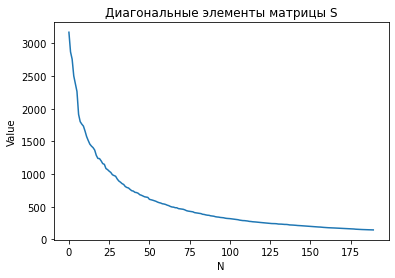

In [10]:
plt.plot(S[10:200])
plt.xlabel('N')
plt.ylabel('Value')
plt.title("Диагональные элементы матрицы S")

Как мы видим сигмы после 75 несравнимо малы относительно первых 75 и стремятся к нулю, а значит можно взять лишь первые 75 компонент



Text(0.5, 1.0, 'Cуммa компонент ранга 1 с первой по семьдесят пятую')

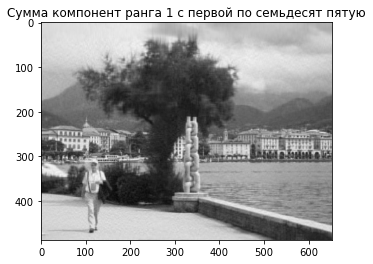

In [11]:
d = np.zeros(488)
d[0:75] = S[0:75]
e = np.diag(d)

plt.imshow(np.dot(np.dot(U, e), VT), cmap='gray')
plt.title("Cуммa компонент ранга 1 с первой по семьдесят пятую")

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

Исходные затраты памяти: $mr + nr + r = r(m + n + 1)$     $r = 488$.   
Новое $r = 75$, а значит мы потребляем в 488/75 = 6.5 раз

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [12]:
print("Исходная матрица: {} байт".format(img.nbytes))
print("U: {} байт, S: {} байт, VT: {} байт".format(U.nbytes, S.nbytes, VT.nbytes))
print("Всего: {} байт".format(U.nbytes + S.nbytes + VT.nbytes))

Исходная матрица: 2549312 байт
U: 1905152 байт, S: 3904 байт, VT: 2549312 байт
Всего: 4458368 байт


In [13]:
U.shape

(488, 488)

Text(0.5, 1.0, 'Проверка, что получаемое изображение подходит')

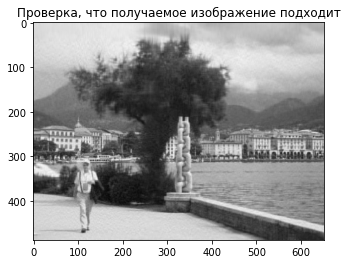

In [14]:
U_n = U[ : ,:75]
VT_n = VT[:75]
S_n = S[0:75]
e = np.diag(S[0:75])
plt.imshow(np.dot(np.dot(U_n, e), VT_n), cmap='gray')
plt.title("Проверка, что получаемое изображение подходит")

In [15]:
print("U_n: {} байт, S_n: {} байт, VT_n: {} байт".format(U_n.nbytes, S_n.nbytes, VT_n.nbytes))
print("Всего: {} байт".format(U_n.nbytes + S_n.nbytes + VT_n.nbytes))

U_n: 292800 байт, S_n: 600 байт, VT_n: 391800 байт
Всего: 685200 байт


In [16]:
print("Изменилось в {} раз".format((U.nbytes + S.nbytes + VT.nbytes)/(U_n.nbytes + S_n.nbytes + VT_n.nbytes)))

Изменилось в 6.506666666666667 раз


Согласуется


### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

Докажем первый переход.

$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$

$$\mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{w}\frac{|U \Sigma V^T w|}{|w|}$$  
Заметим, что поскольку $U$ - ортогональная матрица, то $\forall x \in W$, где W - векторное пространство, над которым построена $U$, верно: $|Ux| = |x|$ так как ортогональный линейный оператор не меняет модуль вектора. Значит верно, что

$$\mathrm{max}_{w}\frac{|U \Sigma V^T w|}{|w|} = \mathrm{max}_{w}\frac{|\Sigma V^T w|}{|w|}$$ 

Теперь заметим, что поскольку $V$ - матрица ортогонального линейного оператора, то обратный к ней будет линейный оператор, задаваемый матрицей $V^T$. (Знаем из лекций). Значит $V^T$ это тоже линейный ортонормированный оператор $W \rightarrow W$. В таком случае мы знаем, что $\forall w' \in W \ \exists w : w' = V^Tw$. И при этом, поскольку $V^T$ также ортогональный линейный оператор, то $|w'| = |V^T w| = |w|$
Значит мы можем через $V^Tw$ получить любой вектор из $W$. И, поскольку нам надо максимизировать, то верно равенство:

$$\mathrm{max}_{w}\frac{|\Sigma V^T w|}{|w|} = \mathrm{max}_{w'}\frac{|\Sigma w'|}{|w'|}$$

Поскольку $\Sigma$ это диагональная матрица, то $\Sigma w' = (\sigma_1 w'_1, \sigma_2 w'_2, \ldots , \sigma_n  w'_n)$ (конечно, имеется ввиду вектору, т.е. столбцу, а не строчке). Значит справедливо равенство: 

$$\mathrm{max}_{w'}\frac{|\Sigma w'|}{|w'|} = \mathrm{max}_{w'}\frac{|(\sigma_1 w'_1, \sigma_2 w'_2, \ldots , \sigma_n  w'_n)|}{|(w'_1, w'_2, \ldots, w'_n)|}$$

иными словами, осталось доказать, что 

$$\frac{|(\sigma_1 w'_1, \sigma_2 w'_2, \ldots , \sigma_n  w'_n)|}{|(w'_1, w'_2, \ldots, w'_n)|} \leq \sigma_1$$

Выберем такой в нашем пространстве $W$ ортонормированный базис. Тогда скалярное произведение в координатах такого базиса будет стандартным. То есть 

$$\frac{|(\sigma_1 w'_1, \sigma_2 w'_2, \ldots , \sigma_n  w'_n)|}{|(w'_1, w'_2, \ldots, w'_n)|} = \sqrt{\frac{\sigma_1^2 {w'_1}^2 + \sigma_2^2 {w'_2}^2 + \ldots + \sigma_n^2 {w'_n}^2}{{w'_1}^2 + {w'_2}^2 + \ldots + {w'_n}^2}}$$

Поскольку $\sigma_1 \geq \sigma_i, \forall i \in [2, 3, \ldots, n]$, то верно, что:

$$\sqrt{\frac{\sigma_1^2 {w'_1}^2 + \sigma_2^2 {w'_2}^2 + \ldots + \sigma_n^2 {w'_n}^2}{{w'_1}^2 + {w'_2}^2 + \ldots + {w'_n}^2}} \leq \sqrt{\frac{\sigma_1^2 {w'_1}^2 + \sigma_1^2 {w'_2}^2 + \ldots + \sigma_1^2 {w'_n}^2}{{w'_1}^2 + {w'_2}^2 + \ldots + {w'_n}^2}} = \sigma_1 \sqrt{\frac{{w'_1}^2 + {w'_2}^2 + \ldots + {w'_n}^2}{{w'_1}^2 + {w'_2}^2 + \ldots + {w'_n}^2}} = \sigma_1 \cdot 1 = \sigma_1$$

Значит, 

$$\mathrm{max}_{w}\frac{|Xw|}{|w|} \leq \sigma_1$$

Докажем теперь, что значение достижимо. Действительно, возьмем $w = V_1$, то есть первому столбцу из матрицы $V$. Тогда 

$$\frac{|Xw|}{|w|} = \frac{|\Sigma V^T V_1|}{1} = |\Sigma \cdot (1, 0, \ldots, 0)^T| = |(\sigma_1, 0, \ldots, 0)^T| = \sigma_1$$

Второе равенство справедливо, т.к. $V$ ортогональна, значит $\forall i \in [2, 3, \ldots, n]: (V_1, V_i) = 0$, и при этом $(V_1, V_1) = 1$

\\

Докажем второй переход.

$$\mathrm{max}_{|w| = 1}~|Xw| = \sigma_1$$

Заметим, что доказательство оценки сверху никак не меняется (поскольку $\mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|w| = 1}\frac{|Xw|}{1} = \mathrm{max}_{|w| = 1}\frac{|Xw|}{|w|}$). Пример, когда оно достижимо, также не меняется ($|V_1| = 1$ поскольку $V$ ортнономирована). Значит,

$$\mathrm{max}_{|w| = 1}~|Xw| = \sigma_1 = \mathrm{max}_{|w|}\frac{|Xw|}{|w|}$$

что и требовалось доказать.

\\

Теперь докажем третье равенство. То есть докажем, что

$$\mathrm{max}_{|u|=|v| = 1}~|u^T Xv| = \sigma_1$$

Заметим, что $u^T Xv = u^T U \Sigma V^T v$. Также верно, что $u^T U = (U^T u)^T$
и, поскольку $U^T$ - ортонормированный линейный оператор (подробнее обсуждали выше), то $|U^T u| = |u| = 1$. Теперь заметим, что мы можем заменить $U^T u$ на $u', |u'| = 1$, т.к. меняя $u$ мы можем менять то, куда он перейдет под воздействием $U^T$ (опять-таки, подробнее обсуждалось выше). Прокрутив рассуждения из первого пунка для $v$, получим:

$$\mathrm{max}_{|u|=|v| = 1}~|u^T Xv| = \mathrm{max}_{|u'|=|v'| = 1}~|u'^T \Sigma v'|$$

Заметим теперь, что $u'^T \Sigma v'$ уже число (видно из размерностей). Рассмотрим подробнее.

$$u'^T \Sigma v' = (\sigma_1 u'_1, \sigma_2 u'_2, \ldots, \sigma_n u'_n) \times v' = \sigma_1 u'_1 v'_1 + \sigma_2 u'_2 v'_2 + \ldots + \sigma_n u'_n v'_n$$

Хотим доказать, что это $\leq \sigma_1$. Действительно, 

$$\sigma_1 u'_1 v'_1 + \sigma_2 u'_2 v'_2 + \ldots + \sigma_n u'_n v'_n \leq \sigma_1 u'_1 v'_1 + \sigma_1 u'_2 v'_2 + \ldots + \sigma_1 u'_n v'_n = \sigma_1 (u'_1 v'_1 + u'_2 v'_2 + \ldots + u'_n v'_n) \leq \sigma_1 \cdot 1 = \sigma_1$$

(последнее неравенство верно вследствии КБШ)

Осталось привести пример. Возьмем $v = V_1, u = U_1$.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортогональными столбцами размеров $n\times r$ и $r\times n$ соответственно, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

Строки матрицы имеют вид $\sin(i) * (\cos(0), ..., cos(n))$, а значит они все линейно зависимы. Ранг матрицы A = r равен 1. 

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

$\Sigma = U^T A V$ - матрица, в которой записаны образы векторов базиса V в базисе U. Так как при замене базиса нулевой вектор переходит в нулевой вектор то по матрице $\Sigma$ мы видим, что векторы $v_{r+1} ... v_{n}$  образуют $ \text{ Ker}\mathcal{A}$.   
Линейная оболочка векторов $\sigma_1u_1,  ..., \sigma_mu_m$ и есть образ нашего линейного отображения. $\sigma_i = 0 : i > r$. Так как векторы U линейнонезависимы то образ $\sigma_1,  ..., \sigma_r$.

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

Представим $A = U \Sigma V^T$

$P = A(A^T A)^{-1} A^T = U \Sigma V^T(V \Sigma ^T U^T \cdot U \Sigma V^T)^{-1} V \Sigma ^T U^T = 
U \Sigma V^T(V \Sigma ^T \Sigma V^T)^{-1} V \Sigma ^T U^T = U \Sigma V^T (V^T)^{-1} (\Sigma ^T \Sigma)^{-1} (V)^{-1} V \Sigma ^T U^T =  U \Sigma (\Sigma ^T \Sigma)^{-1}\Sigma ^T U^T$

Как мы видим U - ортогональная матрица следовательно V и U в разложении матрицы P равны U из А. Рассмотрим $\Sigma (\Sigma ^T \Sigma)^{-1}\Sigma ^T$ она имеет вид n единиц на диагонали - остальные 0, следовательно подходит под матрицу $\Sigma$ в разложении P.

**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

0


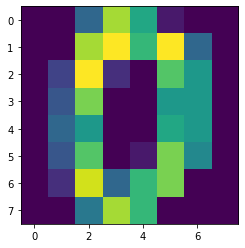

In [17]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[0])

plt.imshow(digits.data[0].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [18]:
U, S, VT = svd(digits.data, full_matrices=False)

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

Text(0.5, 1.0, 'Распределение данных в зависимости от первых двух признаков')

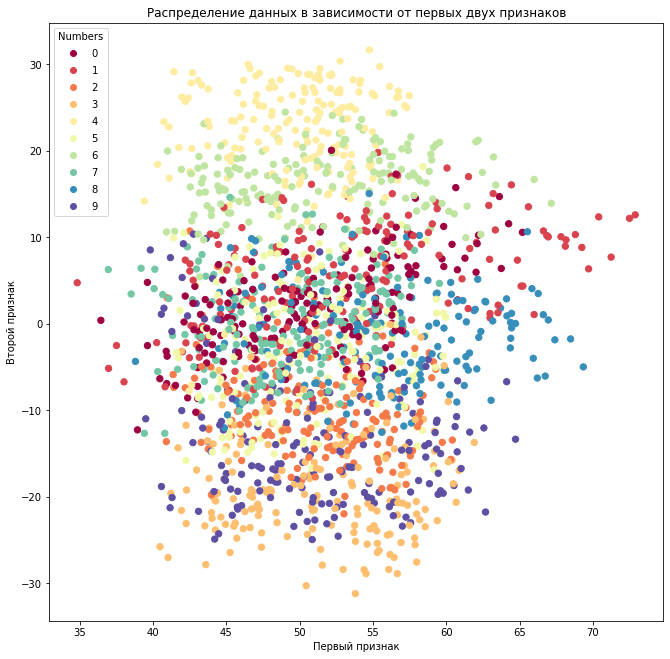

In [19]:
N = U.dot(np.diag(S));

x = N[:, 0]
y = N[:, 1]
plt.figure(figsize = (11, 11))
sc = plt.scatter(x, y, c = digits.target, s = 40, cmap = 'Spectral')
plt.legend(*sc.legend_elements(), title="Numbers")
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title("Распределение данных в зависимости от первых двух признаков")

**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

Text(0.5, 1.0, 'Распределение данных в зависимости от первых двух признаков')

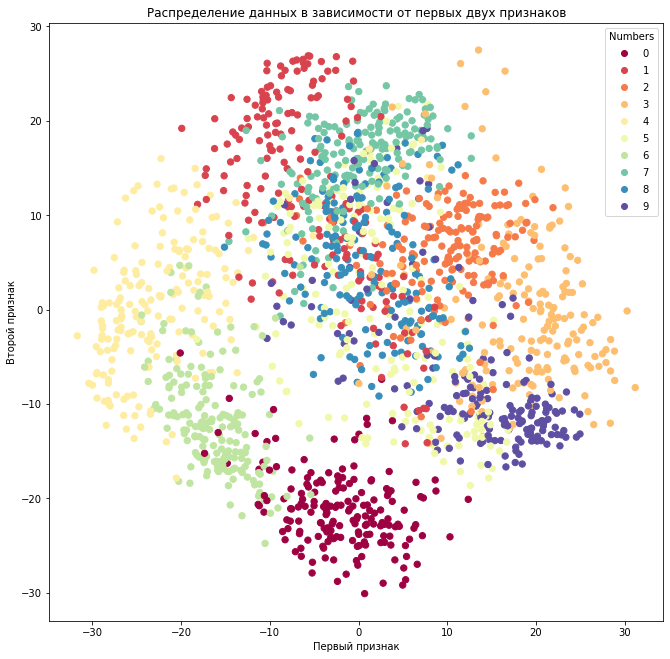

In [20]:
X = digits.data
D = X - X.mean(axis=0, keepdims=True)
U_n, S_n, VT_n = svd(D, full_matrices=False)
N = U_n.dot(np.diag(S_n));

x = N[:, 0]
y = N[:, 1]
plt.figure(figsize = (11, 11))
sc = plt.scatter(x, y, c = digits.target, s = 40, cmap = 'Spectral')
plt.legend(*sc.legend_elements(), title="Numbers")
plt.xlabel('Первый признак')
plt.ylabel('Второй признак')
plt.title("Распределение данных в зависимости от первых двух признаков")

**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

В новой визуализации точки одного типа лучше сгруппированны и кластеры групп точек лучше отделяются друг от друга, в то время как в старой визуализации они перемешаны между собой и отделить можно только группу четверок и шестерок.

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

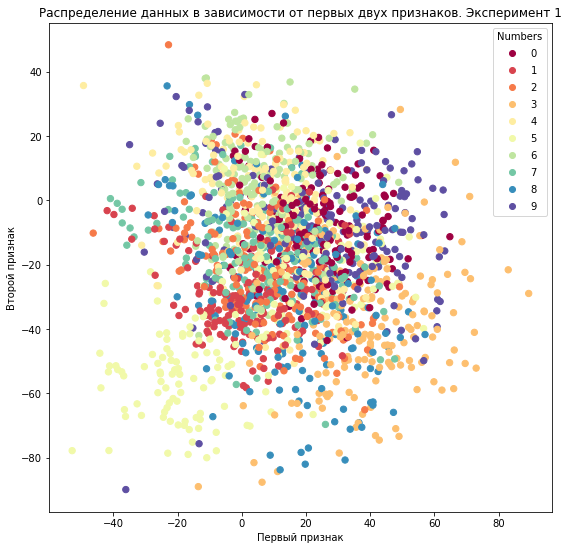

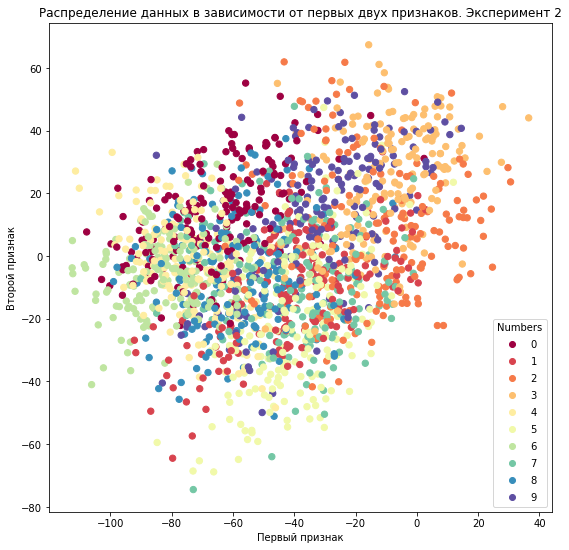

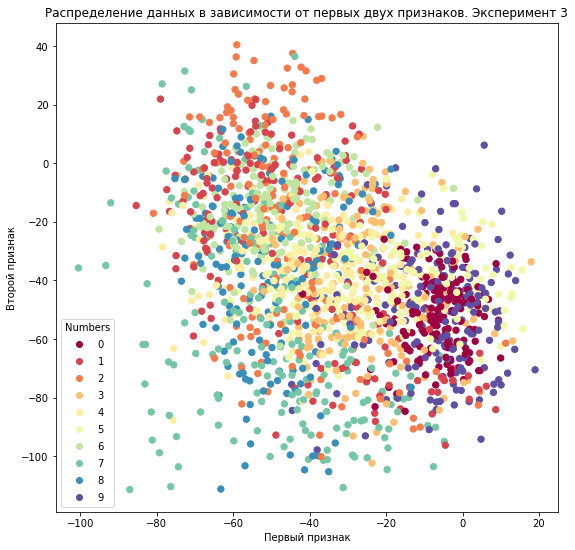

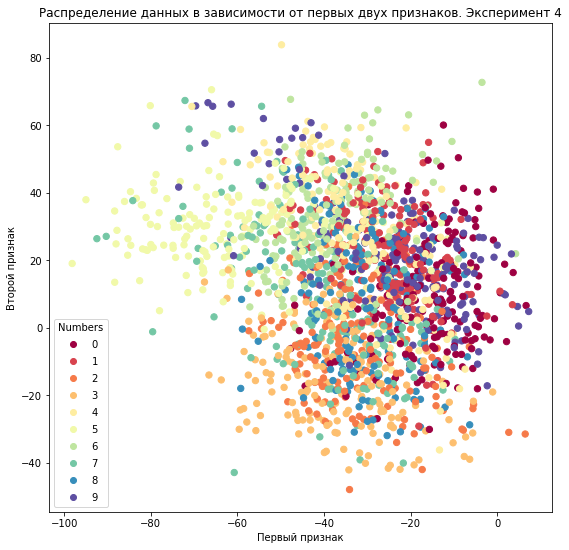

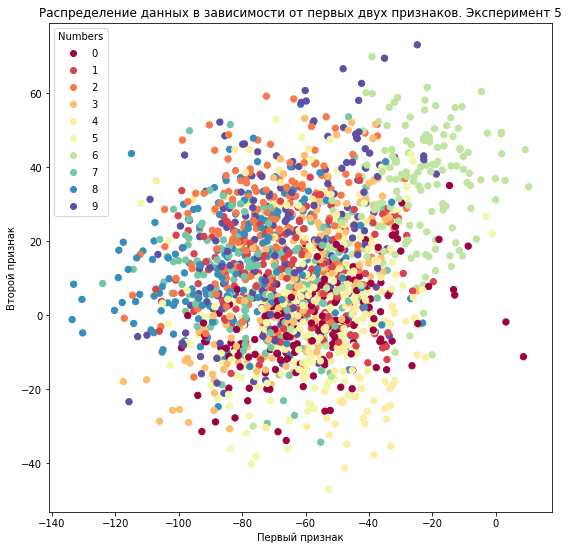

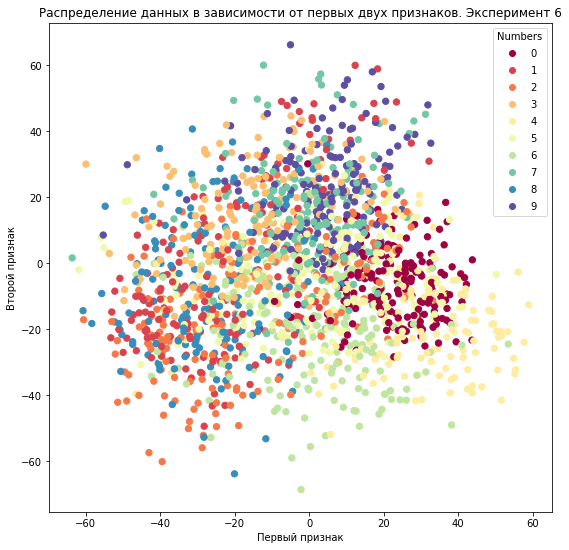

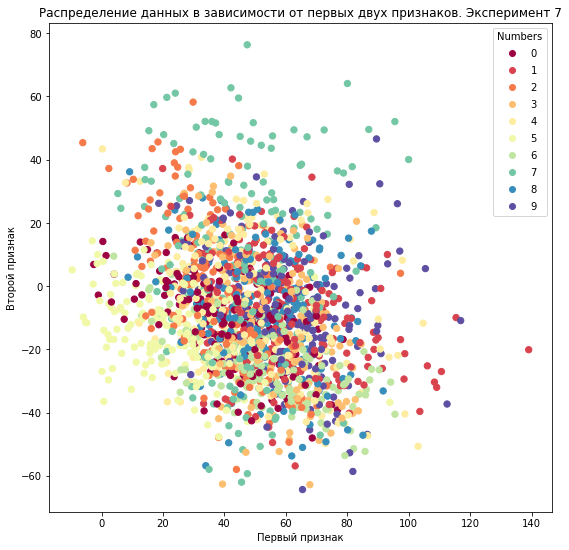

In [21]:
from sklearn.random_projection import GaussianRandomProjection
rng_l = np.random.RandomState(42)
for i in range(7):
    rng = np.random.RandomState(rng_l.randint(0, 1000))
    transformer = GaussianRandomProjection(n_components=2, random_state=rng)
    X_new = transformer.fit_transform(digits.data)
    x = X_new[:, 0]
    y = X_new[:, 1]
    plt.figure(figsize = (9, 9))
    sc = plt.scatter(x, y, c = digits.target, s = 40, cmap = 'Spectral')
    plt.legend(*sc.legend_elements(), title="Numbers")
    plt.xlabel('Первый признак')
    plt.ylabel('Второй признак')
    plt.title("Распределение данных в зависимости от первых двух признаков. Эксперимент {}".format(i+1))

Как мы видим, при изпользовании SVD для понижения проекции кластеры лучше отделены друг от друга, чем при использовании метода случайных гаусовских проекций. Вероятно это может быть связано с тем, что в методе случайных гаусовских проекций случайно выбирается двумерная плоскость для проекции, в то время как в SVD выбираются два наиболее "значимых" признака объекта.

### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, я сгененерирую много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построю аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`.

In [22]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

C:\Users\Public\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Public\anaco\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

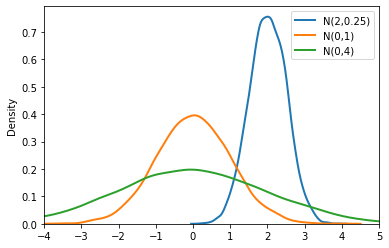

In [23]:
N = 10000
plt.xlim([-4,5])
s = np.random.normal(loc=2, scale=0.5, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(2,0.25)')

s = np.random.normal(loc=0, scale=1, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,
             kde_kws={'linewidth': 2}, label='N(0,1)')

s = np.random.normal(loc=0, scale=2, size=N)   # generate your data sample with N elements
sns.distplot(s, hist=False, kde=True, 
             bins=50,# color = 'darkblue',
             kde_kws={'linewidth': 2}, label='N(0,4)')

plt.legend()
plt.show()

**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**1. [1.5 балла]** Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Докажите, что поверхности уровня $p(x) = c$ — это эллипсоиды.

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = const$$
$$e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = (2\pi)^{n/2}|\Sigma|^{1/2} \cdot const$$
$$-\frac12(x - a)^T\Sigma^{-1}(x - a) = ln((2\pi)^{n/2}|\Sigma|^{1/2} \cdot const)$$

$\Sigma^{-1}\cdot \Sigma = (\Sigma^{-1})^{T}\cdot \Sigma^{T} = (\Sigma^{-1})^{T}\cdot \Sigma \Rightarrow  (\Sigma^{-1})^{T}=\Sigma^{-1} \Rightarrow \Sigma^{-1}$.     $\Sigma^{-1}$ тоже симметричная   
Получается наша квадратичная форма от $x-a$ ассоциированная с матрицей $\Sigma^{-1}$ равна константе. Её можно привести к каноническому виду. Приведем эту квадратичную форму к каноническому виду: ${-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \lambda_1(\widetilde x_1 - a_1)^2 + \lambda_2(\widetilde x_2 - a_2)^2 + ... + \lambda_n(\widetilde x_n - a_n)^2 = const$
$$\frac{ \lambda_1(\widetilde x_1 - a_1)^2}{const} + \frac{ \lambda_2(\widetilde x_2 - a_2)^2}{const}+ ... + \frac{ \lambda_n(\widetilde x_n - a_n)^2}{const} = 1$$   
Таким образом бы получаем канонический вид эллипсоида, следовательно $p(x) = const$ - это эллипсоиды.

**2. [1.5 балла]** Пользуясь теоремой о приведении квадратичной формы к главным осям, докажите, что функцию плотности многомерного нормального распределения можно представить в виде произведения одномерных нормальных плотностей. В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы.

Нам необходимо доказать, что $p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \prod\limits_{i = 1}^{n} \frac1{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(x_i - a_i)^2}{2\sigma_i^2}}$  
  
Заметим, что $\prod\limits_{i = 1}^{n} \frac1{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(x_i - a_i)^2}{2\sigma_i^2}} =\frac1{{(2\pi)^{n/2}(\prod\limits_{i = 1}^{n}\sigma_i^2})^{1/2}}e^{-\frac12(\frac{(x_1 - a_1)^2}{\sigma_1^2} + \frac{(x_2 - a_2)^2}{\sigma_2^2} + \ldots + \frac{(x_n - a_n)^2}{\sigma_n^2})}$  
Из пункта выше следует, что при помощи ортогонального преобразования квадратичная форма может быть приведена к главным осям, а так как на диагонали матрицы $\Sigma$ стоят дисперсии, то и коэфиценты при квадратах будут иметь вид $\lambda_i = \frac1{\sigma_i^2}$. Также нужно будет пересчитать координаты, но т.к. матожидание не изменится, они будут совпадать. Итого будем иметь:  
$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)} = \frac1{{(2\pi)^{n/2}(\prod\limits_{i = 1}^{n}\sigma_i^2})^{1/2}}e^{-\frac12(\frac{(x'_1 - a_1)^2}{\sigma_1^2} + \frac{(x'_2 - a_2)^2}{\sigma_2^2} + \ldots + \frac{(x'_n - a_n)^2}{\sigma_n^2})} = \prod\limits_{i = 1}^{n} \frac1{\sqrt{2\pi\sigma_i^2}}e^{-\frac{(x'_i - a_i)^2}{2\sigma_i^2}}$.  
Ч. и т. д.

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

C:\Users\Public\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

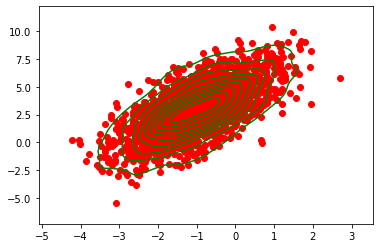

In [24]:
import seaborn as sns
import numpy as np

N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
sns.kdeplot(s[:,0], s[:,1], shade=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**3. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [25]:
s = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=1000)#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

**4. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

C:\Users\Public\anaco\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


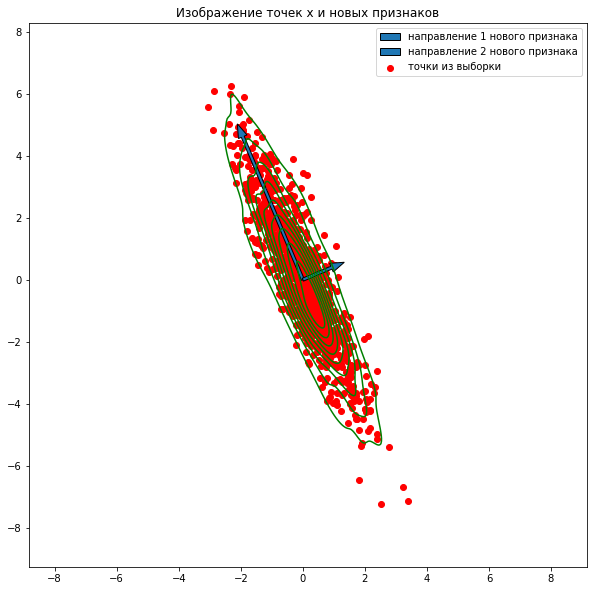

In [26]:
U, S, VT = svd(s, full_matrices=False)

plt.figure(figsize = (10, 10))
plt.axis('equal')
plt.title("Изображение точек х и новых признаков")

plt.scatter(s[:,0], s[:,1], color='red', label="точки из выборки")
sns.kdeplot(s[:,0], s[:,1], shade=False, color='g')

plt.arrow(0, 0, 5*VT[0][0], 5*VT[0][1], width = 0.1, label="направление 1 нового признака")
plt.arrow(0, 0, VT[1][0], VT[1][1], width = 0.1, label="направление 2 нового признака")
plt.legend()


**5. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

\begin{equation*}
А = \left(
\begin{array}{cccc}
1 & -2\\
-2 & 5 \\
\end{array}
\right)
\end{equation*}


Собственные значения равны:

\begin{equation*}
\lambda_1 = -2\sqrt2 + 3 \\
\lambda_2 = 2\sqrt2 + 3 \\
\end{equation*}

Соответствующие им собственные подпространства:

\begin{equation*}
V_{\lambda_1} = < \left(
\begin{array}{cccc}
\sqrt2 + 1\\
1 \\
\end{array}
\right) >
\end{equation*}

\begin{equation*}
V_{\lambda_2} = < \left(
\begin{array}{cccc}
-\sqrt2 + 1\\
1 \\
\end{array}
\right) >
\end{equation*}


Действительно они примерно равны векторам найденным на предыдущем шаге

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**6. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

<ipython-input-27-8cfeafa9aaeb>:2: RuntimeWarning: covariance is not positive-semidefinite.
  s1 = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=np.array([[1,2],[-2.5, -4.5]]), size=N)
<ipython-input-27-8cfeafa9aaeb>:3: RuntimeWarning: covariance is not positive-semidefinite.
  s2 = np.random.multivariate_normal(mean=np.array([1, 0]), cov=np.array([[1,2],[-2.5, -4.5]]), size=N)


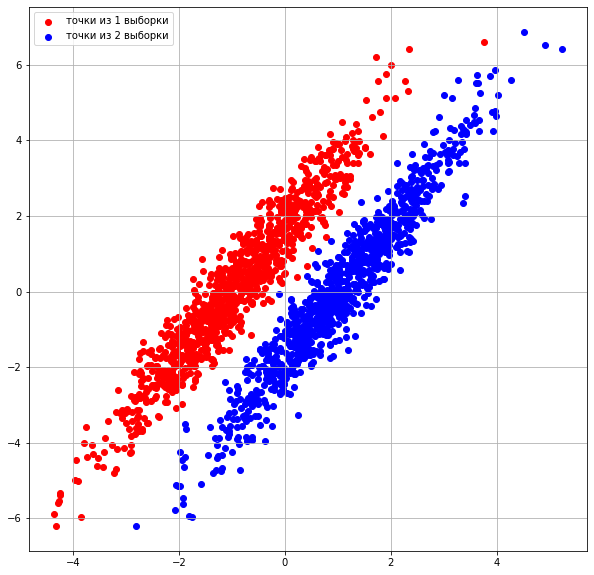

In [27]:
N = 1000
s1 = np.random.multivariate_normal(mean=np.array([-1, 0]), cov=np.array([[1,2],[-2.5, -4.5]]), size=N)
s2 = np.random.multivariate_normal(mean=np.array([1, 0]), cov=np.array([[1,2],[-2.5, -4.5]]), size=N)
s = np.concatenate((s1, s2), axis=0)


plt.figure(figsize = (10, 10))
plt.grid()


plt.scatter(s1[:,0], s1[:,1], color='r', label="точки из 1 выборки")
plt.scatter(s2[:,0], s2[:,1], color='b', label="точки из 2 выборки")
plt.legend()

**7. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

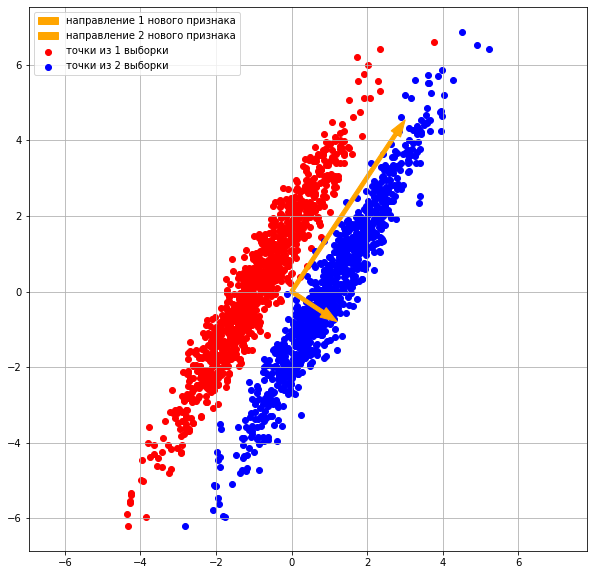

In [28]:
U, S, VT = svd(s, full_matrices=False)

plt.figure(figsize = (10, 10))
plt.grid()
plt.axis('equal')


plt.scatter(s1[:,0], s1[:,1], color='r', label="точки из 1 выборки")
plt.scatter(s2[:,0], s2[:,1], color='b', label="точки из 2 выборки")

plt.arrow(0, 0, 5*VT[0][0], 5*VT[0][1], width = 0.1, color = 'orange', label="направление 1 нового признака")
plt.arrow(0, 0, VT[1][0], VT[1][1], width = 0.1, color = 'orange', label="направление 2 нового признака")
plt.legend()

In [29]:
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=1000)

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**8. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

Направления новых признаков не параллельны осям эллипсоида, поэтому ими нельзя разделить точки принадлежащие одному эллипсу от точек принадлежащих другому.

In [30]:
# Just keep this image as a sample

**9. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [31]:
s = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=1000)

**10. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

Так как матрица $\Sigma$ уже имеет диагональный вид, то и базисы подпространств собственных значений будут иметь вид $\begin{pmatrix} 1\\ 0 \end{pmatrix}$ и $\begin{pmatrix} 0\\ 1 \end{pmatrix}$. Они и есть направления полуосей эллипса

**11. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

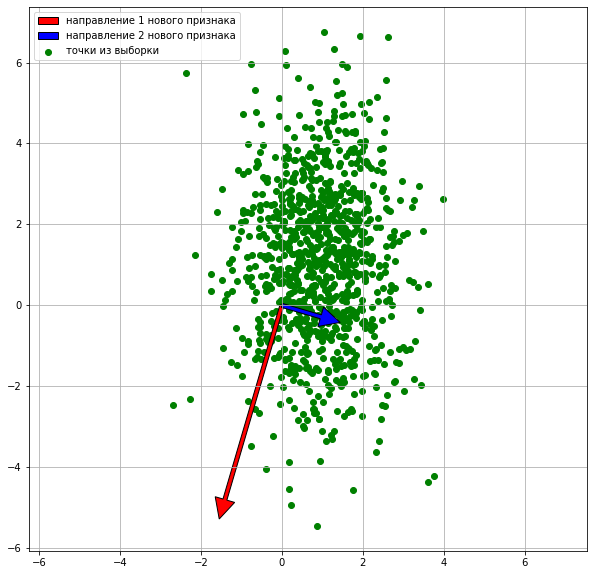

In [39]:
U, S, VT = svd(s, full_matrices=False)

plt.figure(figsize = (10, 10))
plt.grid()
plt.axis('equal')


plt.scatter(s[:,0], s[:,1], color='green', label="точки из выборки")

plt.arrow(0, 0, 5*VT[0][0], 5*VT[0][1],width = 0.1, head_width=0.5, head_length=0.5, fc='r', ec='k', label="направление 1 нового признака")
plt.arrow(0, 0, VT[1][0], VT[1][1], width=0.1, head_width=0.5, head_length=0.5, fc='b', ec='k', label="направление 2 нового признака")
plt.legend()

**12. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

Скорее всего проблема в том что центр нашей выборки находится не в центре координат, поэтому сингулярное разложение работает некорректно. Проблему можно исправить если переместить центр нашего эллипса в начало координат, то есть, как мы делали в втором задании, вычесть из признаков среднее значение по ним. 

Когда мы используем SVD, нам нужно, чтобы данные были централизованы в нуле. Можно предположить, что проблема в последней задаче возникла из-за того, что у нас нет централизации. Сделать централизацию можно отняв от каждого значения его среднее. \
Фух... Это конец!


░▄▀▄▀▀▀▀▄▀▄░░░░░░░░░\
░█░░░░░░░░▀▄░░░░░░▄░\
█░░▀░░▀░░░░░▀▄▄░░█░█\
█░▄░█▀░▄░░░░░░░▀▀░░█\
█░░▀▀▀▀░░░░░░░░░░░░█\
█░░░░░░░░░░░░░░░░░░█\
█░░░░░░░░░░░░░░░░░░█\
░█░░▄▄░░▄▄▄▄░░▄▄░░█░\
░█░▄▀█░▄▀░░█░▄▀█░▄▀░\
░░▀░░░▀░░░░░▀░░░▀░░░